In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/near_miss_2.csv')
df.head()

,neo,a,e,om,w,q,ad,H,moid,n,ma,pha
0,0.0,2.182867,0.399136,185.716715,175.949406,1.311606,3.054128,19.3,0.308412,0.305607,187.785409,0.0
1,0.0,2.959913,0.501663,195.038776,166.033880,1.475034,4.444792,16.3,0.475251,0.193547,185.296903,0.0
2,0.0,3.138372,0.570315,194.400862,174.804636,1.348512,4.928232,17.9,0.348952,0.177275,201.801149,0.0
3,1.0,1.271515,0.192164,190.838409,160.724354,1.027175,1.515855,27.4,0.026562,0.687419,186.647637,0.0
4,1.0,1.375191,0.409293,185.770768,163.084450,0.812335,1.938048,19.1,0.176155,0.611166,185.069022,0.0


In [3]:
df.iloc[:,1:-1].describe()

,a,e,om,w,q,ad,H,moid,n,ma
count,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4030.000000,4.030000e+03,4030.000000,4030.000000
mean,1.823163,0.472752,178.313155,179.119955,0.894355,2.751971,20.937374,9.643158e-02,0.515303,184.567745
std,0.991326,0.181173,79.100706,77.155951,0.289020,1.935330,2.638702,1.286695e-01,0.310855,83.442329
min,0.555276,0.006671,0.086611,0.240372,0.092870,0.793839,9.450000,3.437640e-07,0.002816,0.034200
25%,1.315925,0.344842,129.099780,127.399602,0.715213,1.783073,19.300000,1.549585e-02,0.288028,128.510674
50%,1.805128,0.480115,180.320834,180.222031,0.921897,2.694569,20.630500,3.528350e-02,0.406389,184.903284
75%,2.270806,0.601032,226.972252,229.732730,1.054147,3.551081,21.900000,1.271320e-01,0.652916,241.661065
max,49.661585,0.995869,359.849201,359.832116,1.507036,99.118039,30.200000,4.997390e-01,2.381994,359.989549


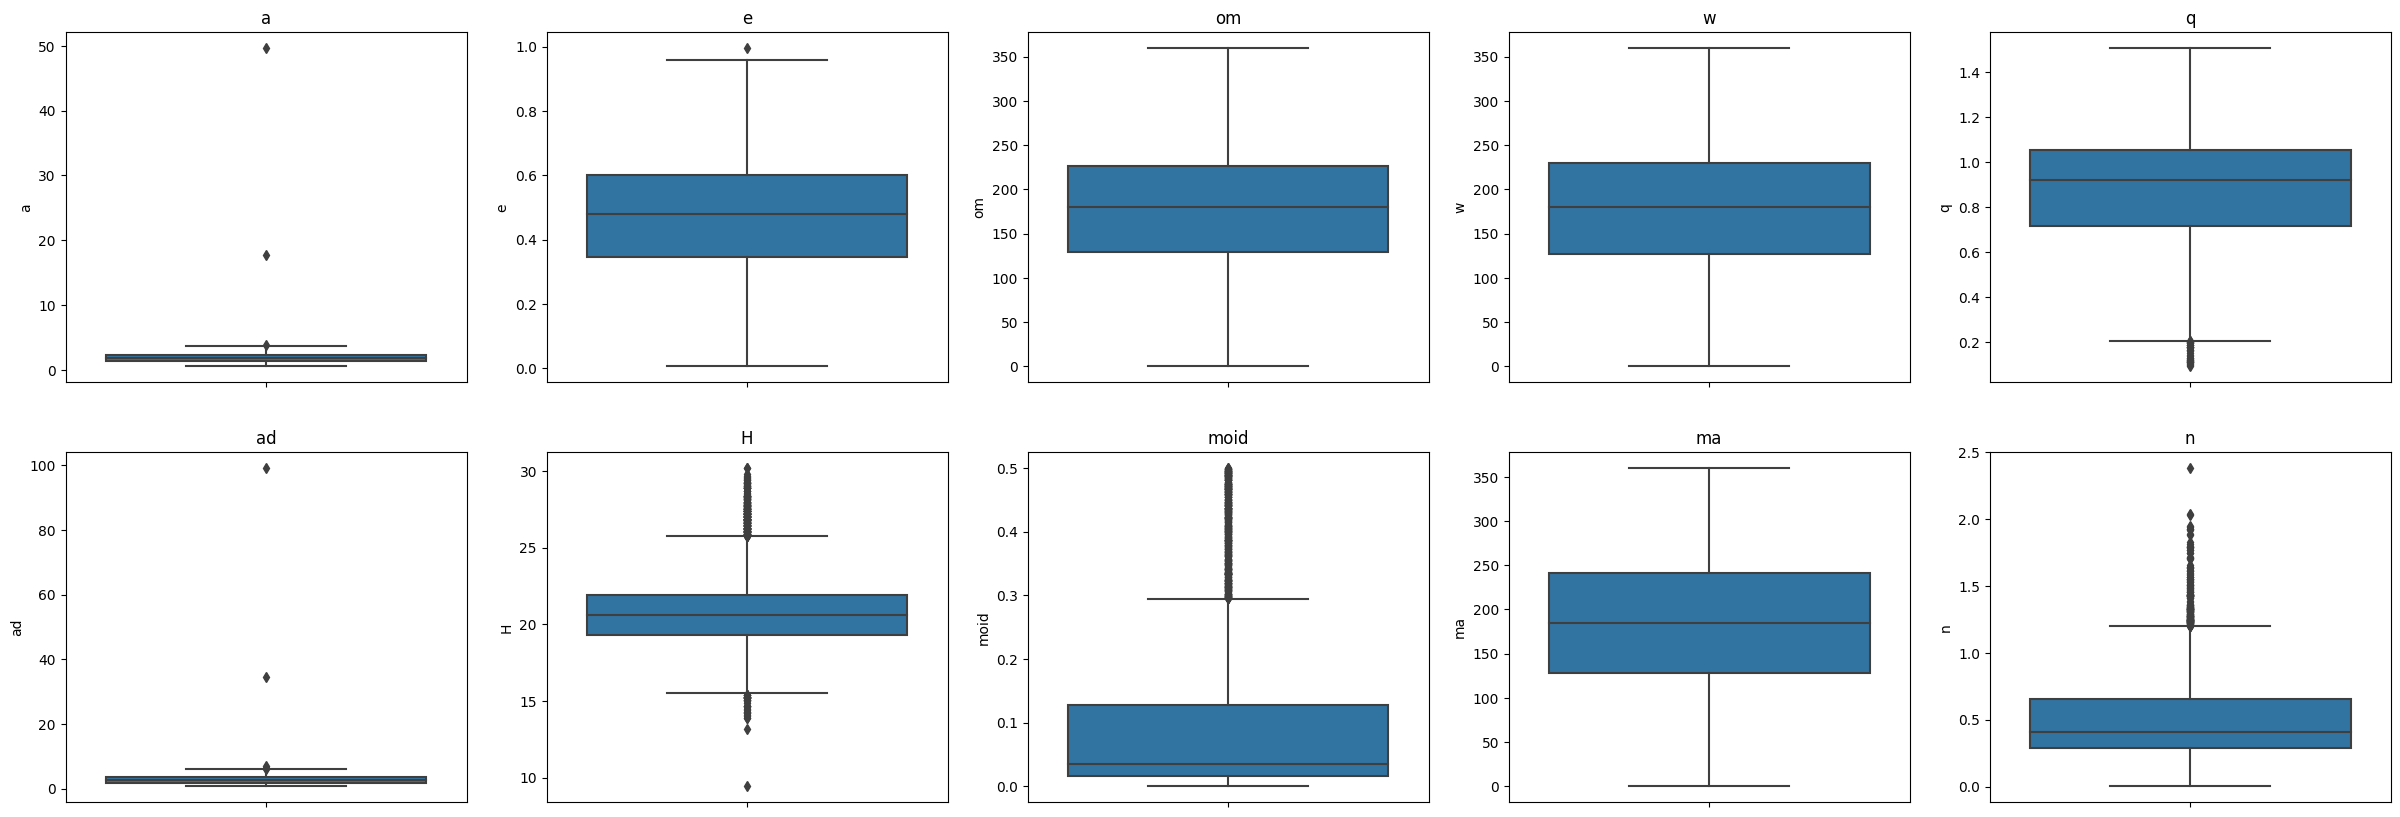

In [4]:
figure, axis = plt.subplots(2, 5, figsize=(30,10))

sns.boxplot(ax=axis[0,0], data=df, y='a')
axis[0,0].set_title('a')

sns.boxplot(ax=axis[0,1], data=df, y='e')
axis[0,1].set_title('e')

sns.boxplot(ax=axis[0,2], data=df, y='om')
axis[0,2].set_title('om')

sns.boxplot(ax=axis[0,3], data=df, y='w')
axis[0,3].set_title('w')

sns.boxplot(ax=axis[0,4], data=df, y='q')
axis[0,4].set_title('q')

sns.boxplot(ax=axis[1,0], data=df,  y='ad')
axis[1,0].set_title('ad')

sns.boxplot(ax=axis[1,1], data=df, y='H')
axis[1,1].set_title('H')

sns.boxplot(ax=axis[1,2], data=df, y='moid')
axis[1,2].set_title('moid')

sns.boxplot(ax=axis[1,3], data=df, y='ma')
axis[1,3].set_title('ma')

sns.boxplot(ax=axis[1,4], data=df, y='n')
axis[1,4].set_title('n')

plt.savefig('plots/nm2/dist_with_outliers_raw.png')
plt.show()

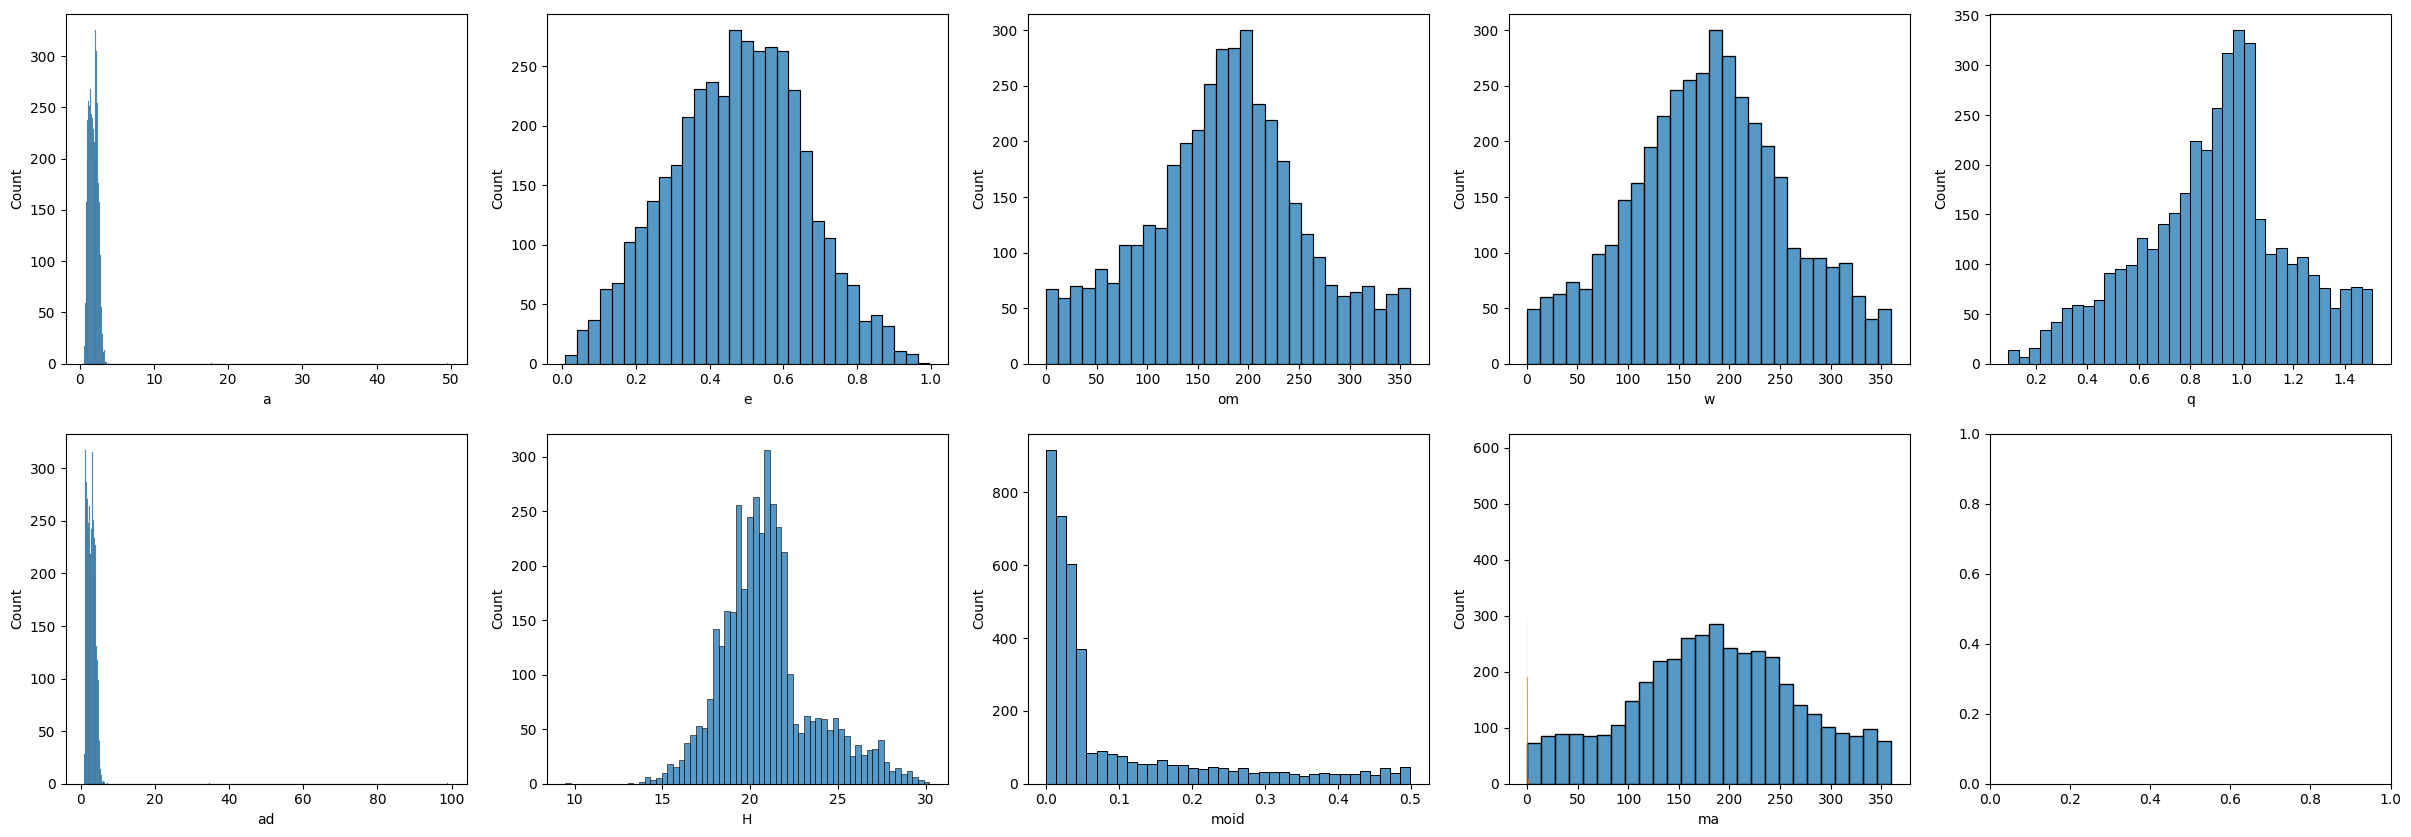

In [5]:
figure, axis = plt.subplots(2, 5, figsize=(30,10))

sns.histplot(ax=axis[0,0], data=df, x='a')

sns.histplot(ax=axis[0,1], data=df, x='e')

sns.histplot(ax=axis[0,2], data=df, x='om')

sns.histplot(ax=axis[0,3], data=df, x='w')

sns.histplot(ax=axis[0,4], data=df, x='q')

sns.histplot(ax=axis[1,0], data=df,  x='ad')

sns.histplot(ax=axis[1,1], data=df, x='H')

sns.histplot(ax=axis[1,2], data=df, x='moid')

sns.histplot(ax=axis[1,3], data=df, x='ma')

sns.histplot(ax=axis[1,3], data=df, x='n')

plt.savefig('plots/nm2/hist_with_outliers_raw.png')
plt.show()

In [6]:
col_names = list(df.columns.values)

for c_name in col_names[1:-1]:
    quant_25 = df[c_name].quantile(0.25)
    quant_75 = df[c_name].quantile(0.75)
    iqr = quant_75 - quant_25
    outliers = [True if (val < quant_25-(1.5*iqr) or val > quant_75+(1.5*iqr)) else False for val in df[c_name]]
    
    
    df[c_name] = np.where(outliers, np.nan, df[c_name])

In [7]:
for c_name in col_names[1:-1]:
    grouped_mean = df.groupby(["neo", "pha"])[c_name].quantile(0.50)
    neo0 = [val[0] and val[1] for val in zip(df[c_name].isna(),df['neo'] == 0)]
    neo1_pha0 = [val[0] and val[1] and val[2] for val in zip(df[c_name].isna(), df['neo'] == 1, df['pha'] == 0 )]

    df[c_name] = np.where(neo0, grouped_mean[0][0], df[c_name])
    df[c_name] = np.where(neo1_pha0, grouped_mean[1][0], df[c_name])
    df[c_name] = np.where(df[c_name].isna(), grouped_mean[1][1], df[c_name])

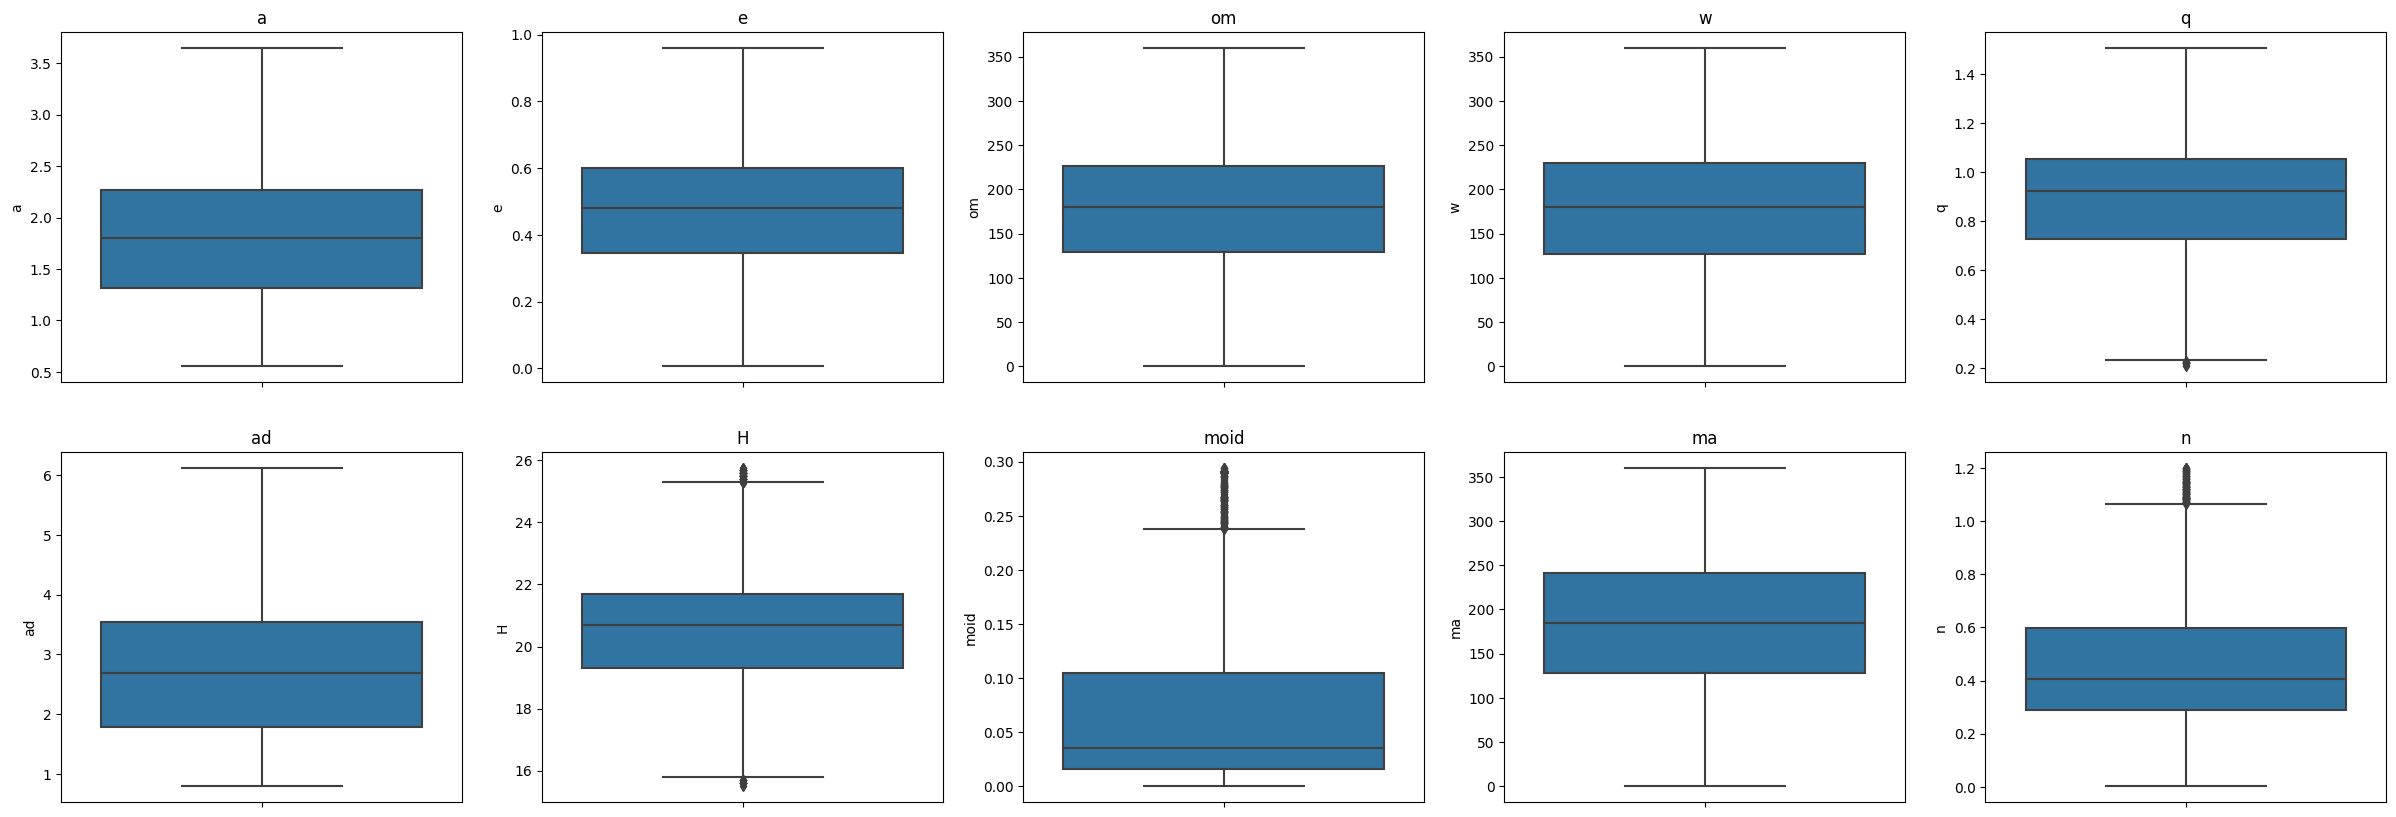

In [8]:
figure, axis = plt.subplots(2, 5, figsize=(30,10))

sns.boxplot(ax=axis[0,0], data=df, y='a')
axis[0,0].set_title('a')

sns.boxplot(ax=axis[0,1], data=df, y='e')
axis[0,1].set_title('e')

sns.boxplot(ax=axis[0,2], data=df, y='om')
axis[0,2].set_title('om')

sns.boxplot(ax=axis[0,3], data=df, y='w')
axis[0,3].set_title('w')

sns.boxplot(ax=axis[0,4], data=df, y='q')
axis[0,4].set_title('q')

sns.boxplot(ax=axis[1,0], data=df,  y='ad')
axis[1,0].set_title('ad')

sns.boxplot(ax=axis[1,1], data=df, y='H')
axis[1,1].set_title('H')

sns.boxplot(ax=axis[1,2], data=df, y='moid')
axis[1,2].set_title('moid')

sns.boxplot(ax=axis[1,3], data=df, y='ma')
axis[1,3].set_title('ma')

sns.boxplot(ax=axis[1,4], data=df, y='n')
axis[1,4].set_title('n')

plt.savefig('plots/nm2/dist_without_outliers.png')
plt.show()

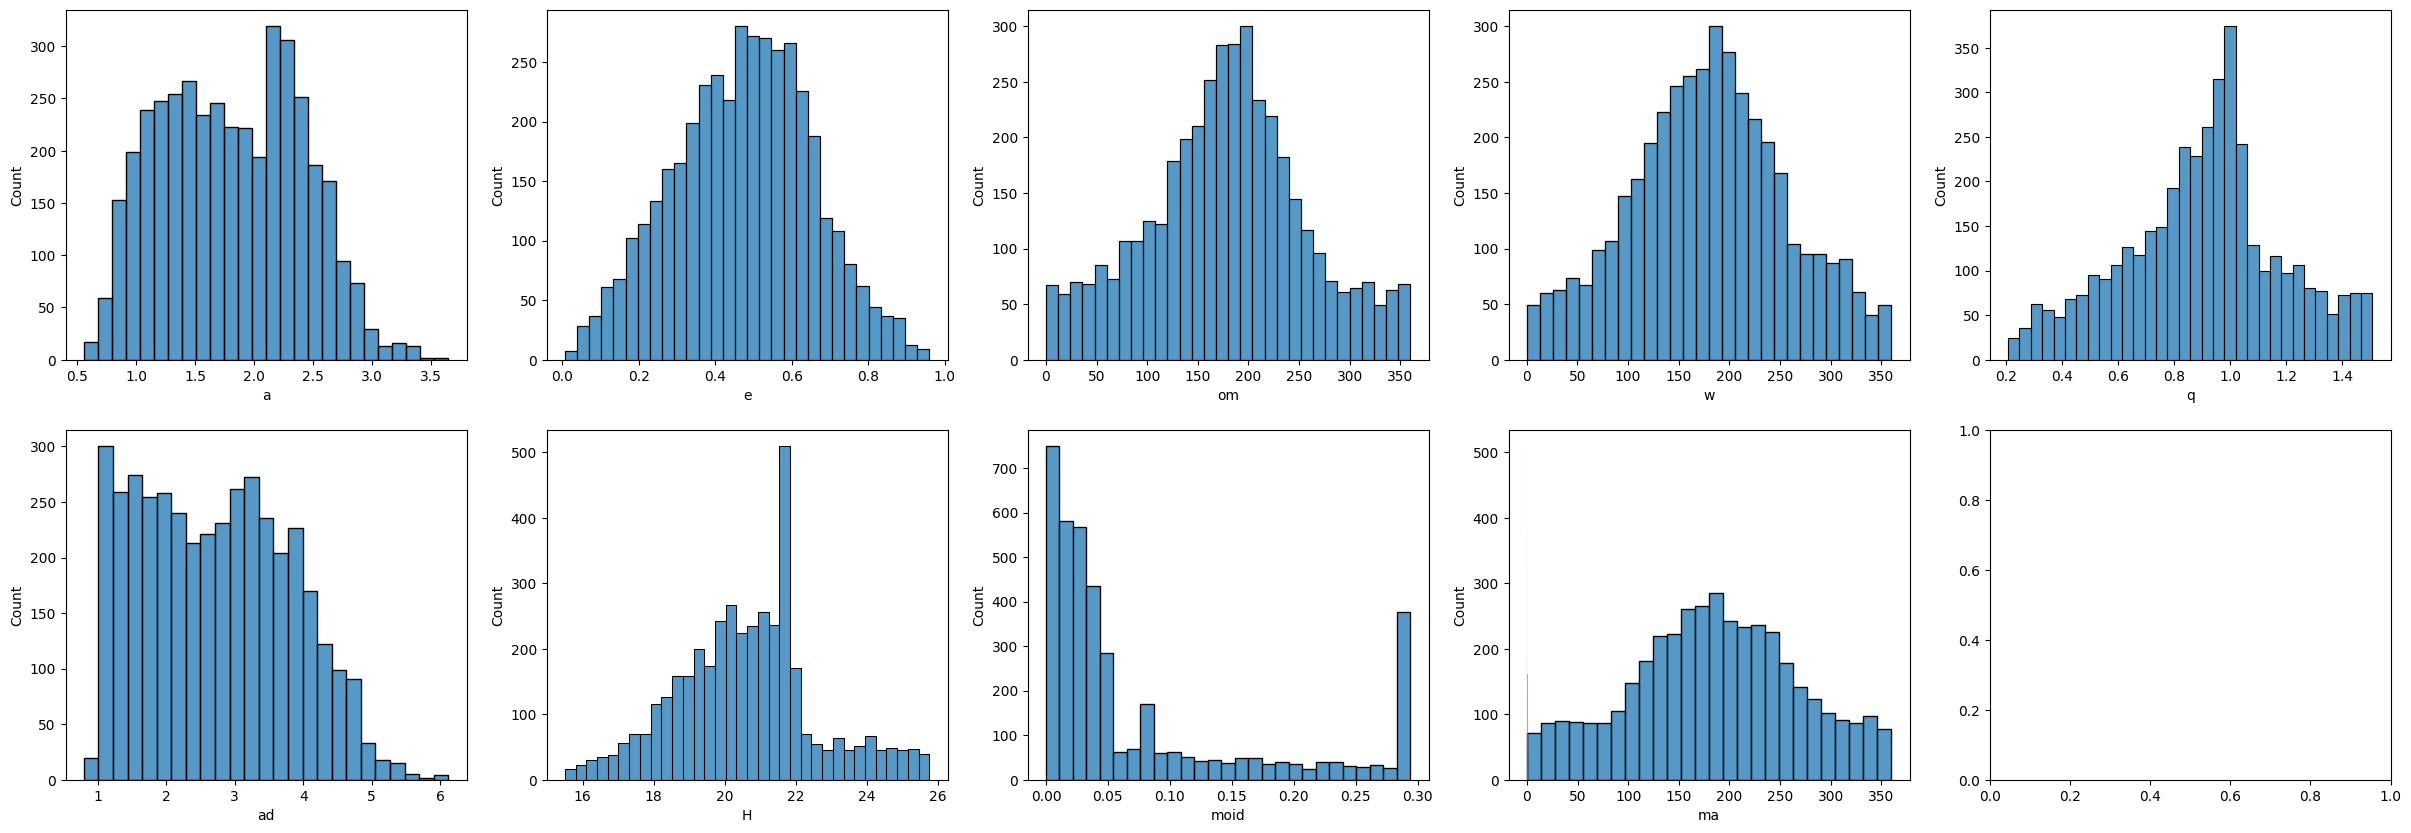

In [9]:
figure, axis = plt.subplots(2, 5, figsize=(30,10))

sns.histplot(ax=axis[0,0], data=df, x='a')

sns.histplot(ax=axis[0,1], data=df, x='e')

sns.histplot(ax=axis[0,2], data=df, x='om')

sns.histplot(ax=axis[0,3], data=df, x='w')

sns.histplot(ax=axis[0,4], data=df, x='q')

sns.histplot(ax=axis[1,0], data=df,  x='ad')

sns.histplot(ax=axis[1,1], data=df, x='H')

sns.histplot(ax=axis[1,2], data=df, x='moid')

sns.histplot(ax=axis[1,3], data=df, x='ma')

sns.histplot(ax=axis[1,3], data=df, x='n')

plt.savefig('plots/nm2/hist_without_outliers.png')
plt.show()

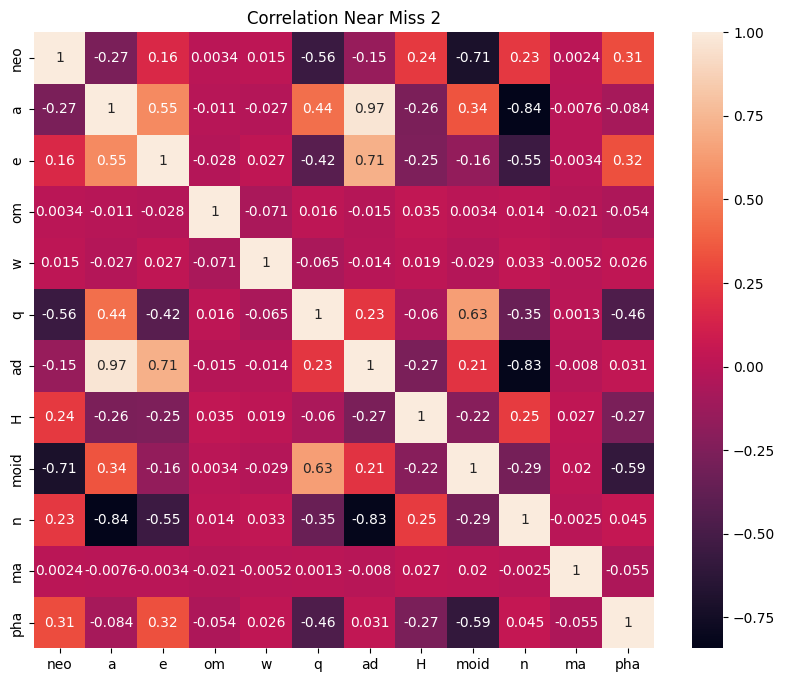

In [10]:
corr = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.title('Correlation Near Miss 2')
plt.savefig('plots/nm2/corr_heatmap.png')

In [11]:
working_df = df[['neo','e','q','pha']]
working_df.head()

,neo,e,q,pha
0,0.0,0.399136,1.311606,0.0
1,0.0,0.501663,1.475034,0.0
2,0.0,0.570315,1.348512,0.0
3,1.0,0.192164,1.027175,0.0
4,1.0,0.409293,0.812335,0.0


In [12]:
from sklearn.model_selection import train_test_split

X = working_df.drop('pha', axis='columns')
y = working_df['pha']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.feature_selection import chi2

scores, pvalues = chi2(X, y)

for val in zip(pvalues, working_df.columns): print(f'{val[1]}:\t{val[0]}')

neo:	4.272658119062272e-09
e:	6.00626840388795e-08
q:	3.580860203638732e-18


In [14]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

In [15]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

import tensorflow as tf

## SMV linear

Accuracy: 0.77
Sensitivity: 0.78
Specificty: 0.77


<AxesSubplot: >

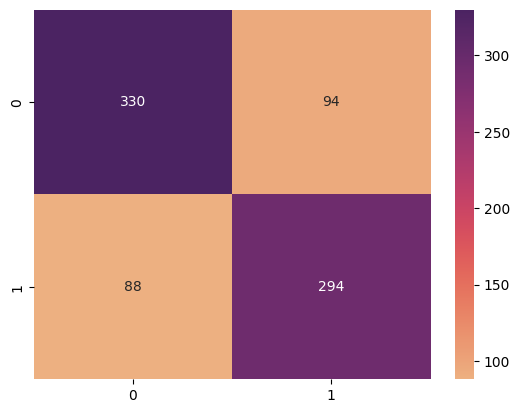

In [16]:
svc_linear = SVC(kernel='linear', random_state=0).fit(X_train_std, y_train)
y_pred = svc_linear.predict(X_test_std)


ac_score = accuracy_score(y_pred, y_test)
cf_matrix = confusion_matrix(y_pred, y_test)
sensitivity = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
specificity = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])


print(f'Accuracy: {ac_score:.2f}')
print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificty: {specificity:.2f}')
sns.heatmap(cf_matrix, annot=True, cmap='flare', fmt='.0f')

In [17]:
accuracies = cross_val_score(estimator=svc_linear, X=X_train_std, y=y_train, cv=10)

print(f'Accuracy: {accuracies.mean()*100:.2f}%')
print(f'Standard Deviation: {accuracies.std()*100:.2f}%')

Accuracy: 72.86%
Standard Deviation: 1.85%


## SVM rbf

Accuracy: 0.78
Sensitivity: 0.85
Specificty: 0.73


<AxesSubplot: >

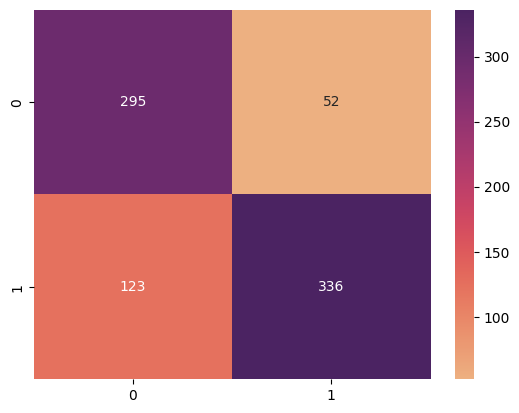

In [18]:
svc_rbf = SVC(kernel='rbf', random_state=0).fit(X_train_std, y_train)
y_pred = svc_rbf.predict(X_test_std)


ac_score = accuracy_score(y_pred, y_test)
cf_matrix = confusion_matrix(y_pred, y_test)
sensitivity = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
specificity = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])


print(f'Accuracy: {ac_score:.2f}')
print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificty: {specificity:.2f}')
sns.heatmap(cf_matrix, annot=True, cmap='flare', fmt='.0f')

In [19]:
accuracies = cross_val_score(estimator=svc_rbf, X=X_train_std, y=y_train, cv=10)

print(f'Accuracy: {accuracies.mean()*100:.2f}%')
print(f'Standard Deviation: {accuracies.std()*100:.2f}%')

Accuracy: 76.95%
Standard Deviation: 1.47%


## SVM best model

In [20]:
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

gs = GridSearchCV(estimator=svc_linear, 
                  param_grid=parameters, 
                  scoring='accuracy',
                  cv=10,
                  n_jobs=4)


gs.fit(X_train_std, y_train)


best_accuracy = gs.best_score_
best_parameters = gs.best_params_

print(f'Best Accuracy: {best_accuracy*100:.2f}%')
print(f'Best Parameters: {best_parameters}')

Best Accuracy: 77.39%
Best Parameters: {'C': 0.25, 'gamma': 0.5, 'kernel': 'rbf'}


## Random Forest

Accuracy: 0.78
Sensitivity: 0.86
Specificty: 0.73


<AxesSubplot: >

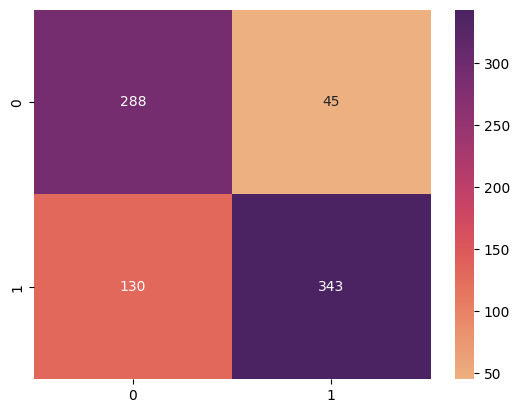

In [21]:
rf = RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=100, random_state=0).fit(X_train_std, y_train)
y_pred = rf.predict(X_test_std)


ac_score = accuracy_score(y_pred, y_test)
cf_matrix = confusion_matrix(y_pred, y_test)
sensitivity = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
specificity = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])


print(f'Accuracy: {ac_score:.2f}')
print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificty: {specificity:.2f}')
sns.heatmap(cf_matrix, annot=True, cmap='flare', fmt='.0f')

In [22]:
accuracies = cross_val_score(estimator=rf, X=X_train_std, y=y_train, cv=10)

print(f'Accuracy: {accuracies.mean()*100:.2f}%')
print(f'Standard Deviation: {accuracies.std()*100:.2f}%')

Accuracy: 77.57%
Standard Deviation: 1.02%


## Best Random Forest

In [23]:
parameters = [{'criterion': ['entropy'], 'max_depth': [3, 4, 5, 6, 7, 9], 'n_estimators': [40, 60, 80, 100, 120, 140, 160, 180, 200]}]

gs = GridSearchCV(estimator=rf, 
                  param_grid=parameters, 
                  scoring='accuracy',
                  cv=10,
                  n_jobs=4)


gs.fit(X_train_std, y_train)


best_accuracy = gs.best_score_
best_parameters = gs.best_params_

print(f'Best Accuracy: {best_accuracy*100:.2f}%')
print(f'Best Parameters: {best_parameters}')

Best Accuracy: 77.91%
Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 40}


## KNN

Accuracy: 0.75
Sensitivity: 0.79
Specificty: 0.71


<AxesSubplot: >

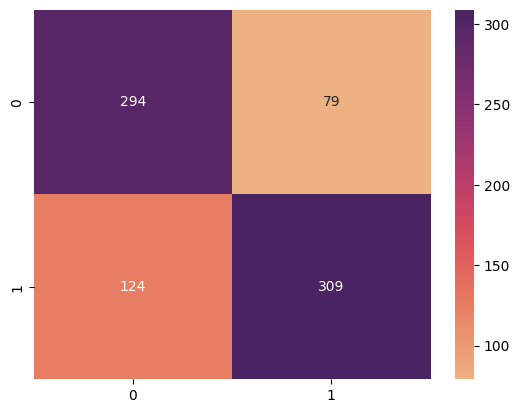

In [24]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2, metric='minkowski').fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)


ac_score = accuracy_score(y_pred, y_test)
cf_matrix = confusion_matrix(y_pred, y_test)
sensitivity = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
specificity = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])


print(f'Accuracy: {ac_score:.2f}')
print(f'Sensitivity: {sensitivity:.2f}')
print(f'Specificty: {specificity:.2f}')
sns.heatmap(cf_matrix, annot=True, cmap='flare', fmt='.0f')

In [25]:
accuracies = cross_val_score(estimator=knn, X=X_train_std, y=y_train, cv=10)

print(f'Accuracy: {accuracies.mean()*100:.2f}%')
print(f'Standard Deviation: {accuracies.std()*100:.2f}%')

Accuracy: 74.07%
Standard Deviation: 1.73%


## Best KNN

In [26]:
parameters = [{'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}]

gs = GridSearchCV(estimator=knn, 
                  param_grid=parameters, 
                  scoring='accuracy',
                  cv=10,
                  n_jobs=4)


gs.fit(X_train_std, y_train)


best_accuracy = gs.best_score_
best_parameters = gs.best_params_

print(f'Best Accuracy: {best_accuracy*100:.2f}%')
print(f'Best Parameters: {best_parameters}')

Best Accuracy: 77.45%
Best Parameters: {'n_neighbors': 21}


## ANN

In [27]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=3, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ann.fit(X_train_std, y_train, batch_size=32, epochs=100)

Epoch 1/100
101/101 [==============================] - 0s 590us/step - loss: 0.6813 - accuracy: 0.4705
Epoch 2/100
101/101 [==============================] - 0s 620us/step - loss: 0.6070 - accuracy: 0.5779
Epoch 3/100
101/101 [==============================] - 0s 650us/step - loss: 0.5879 - accuracy: 0.5862
Epoch 4/100
101/101 [==============================] - 0s 640us/step - loss: 0.5808 - accuracy: 0.7035
Epoch 5/100
101/101 [==============================] - 0s 640us/step - loss: 0.5765 - accuracy: 0.7258
Epoch 6/100
101/101 [==============================] - 0s 640us/step - loss: 0.5730 - accuracy: 0.7252
Epoch 7/100
101/101 [==============================] - 0s 620us/step - loss: 0.5700 - accuracy: 0.7233
Epoch 8/100
101/101 [==============================] - 0s 630us/step - loss: 0.5673 - accuracy: 0.7236
Epoch 9/100
101/101 [==============================] - 0s 620us/step - loss: 0.5649 - accuracy: 0.7233
Epoch 10/100
101/101 [==============================] - 0s 640us/step - l

In [28]:
def metrics(cf_matrix):
    accuracy = (cf_matrix[0,0]+cf_matrix[1,1])/(cf_matrix[0,0]+cf_matrix[1,0]+cf_matrix[0,1]+cf_matrix[1,1])
    precision = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[1,0])
    sensitivity = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
    specificity = cf_matrix[1,1]/(cf_matrix[1,1]+cf_matrix[1,0])

    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Sensitivity: {sensitivity:.2f}')
    print(f'Specificty: {specificity:.2f}')

# BEST MODELS

Accuracy: 0.78
Precision: 0.71
Sensitivity: 0.85
Specificty: 0.73


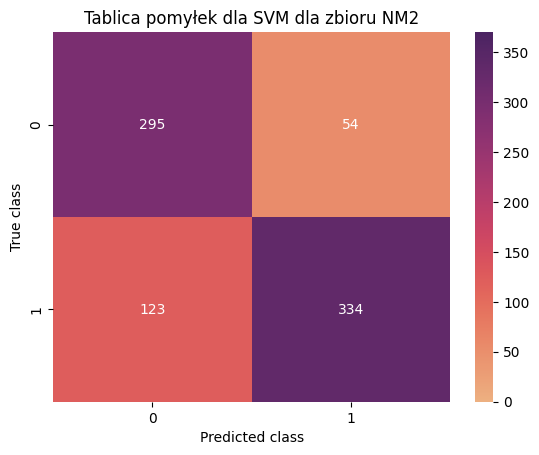

In [29]:
svc_rbf = SVC(kernel='rbf', C=0.25, gamma=0.5, random_state=0).fit(X_train_std, y_train)
y_pred = svc_rbf.predict(X_test_std)


matr = cf_matrix=confusion_matrix(y_pred, y_test)
metrics(matr)

plt.figure()
sns.heatmap(cf_matrix, annot=True, cmap='flare', fmt='.0f', vmin=0, vmax=370)
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Tablica pomyłek dla SVM dla zbioru NM2')
plt.savefig('conf_matrix/nm2_svm.png')

Accuracy: 0.78
Precision: 0.70
Sensitivity: 0.86
Specificty: 0.73


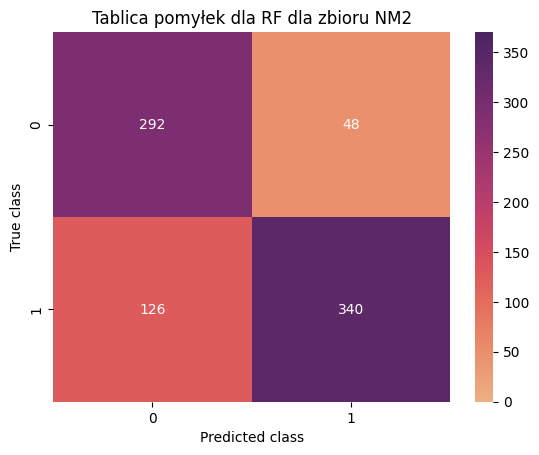

In [30]:
rf = RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=40, random_state=0).fit(X_train_std, y_train)
y_pred = rf.predict(X_test_std)


matr = cf_matrix=confusion_matrix(y_pred, y_test)
metrics(matr)


plt.figure()
sns.heatmap(cf_matrix, annot=True, cmap='flare', fmt='.0f', vmin=0, vmax=370)
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Tablica pomyłek dla RF dla zbioru NM2')
plt.savefig('conf_matrix/nm2_rf.png')

Accuracy: 0.79
Precision: 0.71
Sensitivity: 0.85
Specificty: 0.74


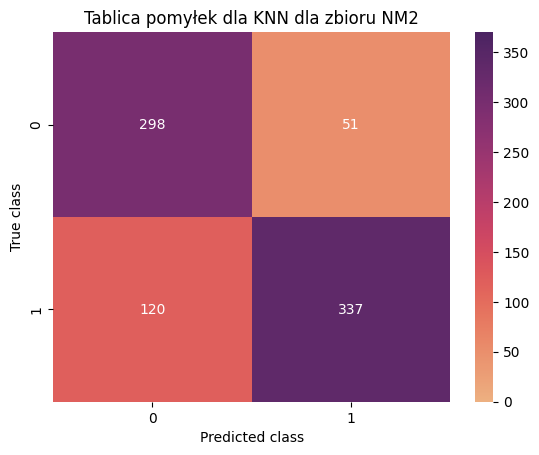

In [31]:
knn = KNeighborsClassifier(n_neighbors=21, weights='uniform', p=2, metric='minkowski').fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)


matr = cf_matrix=confusion_matrix(y_pred, y_test)
metrics(matr)


plt.figure()
sns.heatmap(cf_matrix, annot=True, cmap='flare', fmt='.0f', vmin=0, vmax=370)
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Tablica pomyłek dla KNN dla zbioru NM2')
plt.savefig('conf_matrix/nm2_knn.png')

26/26 [==============================] - 0s 520us/step
Accuracy: 0.78
Precision: 0.73
Sensitivity: 0.83
Specificty: 0.74


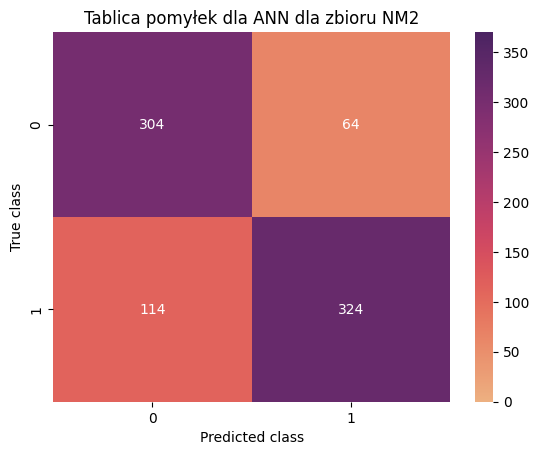

In [32]:
y_predict = ann.predict(X_test_std)
y_pred = (y_predict > 0.5)

matr = cf_matrix=confusion_matrix(y_pred, y_test)

metrics(matr)
plt.figure()
sns.heatmap(cf_matrix, annot=True, cmap='flare', fmt='.0f', vmin=0, vmax=370)
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Tablica pomyłek dla ANN dla zbioru NM2')
plt.savefig('conf_matrix/nm2_ann.png')